In [1]:
import numpy as np

### 3.1.3 Classification of samples that are not linearly separable

In [2]:
n = 100

# label a
mA = [5, 2]
sigma = 0.5
aX1 = np.random.normal(mA[0], sigma, n)
aX2 = np.random.normal(mA[1], sigma, n)
a = np.vstack((aX1, aX2, np.zeros(n)))
a.shape, a[:,:5]

((3, 100),
 array([[4.99407411, 5.6883762 , 5.61182063, 5.57728463, 6.65937099],
        [1.35475464, 1.91923216, 2.59965538, 2.18097419, 0.38894762],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

In [3]:
# label b
mB = [20, 20]
bX1 = np.random.normal(mB[0], sigma, n)
bX2 = np.random.normal(mB[1], sigma, n)
b = np.vstack((bX1, bX2, np.ones(n)))
b.shape, b[:,:5]

((3, 100),
 array([[19.26400155, 19.53396902, 20.53842031, 20.35282382, 20.88808751],
        [19.88228527, 18.75950305, 18.79216944, 21.2248705 , 20.22410184],
        [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ]]))

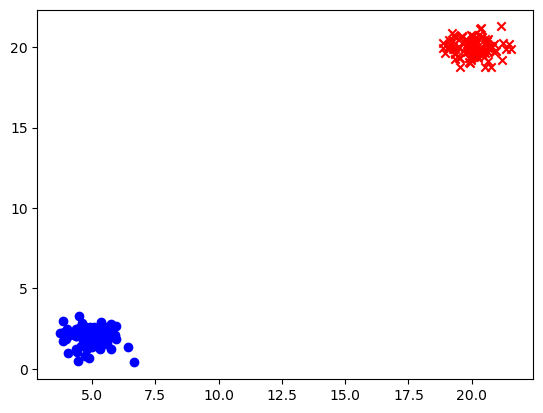

In [4]:
import matplotlib.pyplot as plt
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')

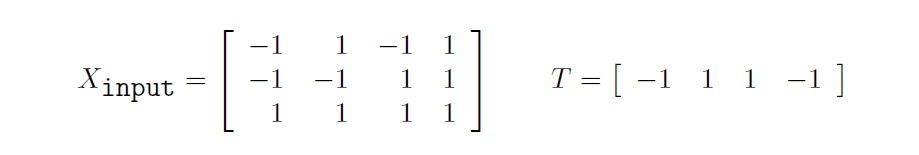

In [5]:
dataset = np.hstack((a,b))
dataset[:,:5], dataset.shape

(array([[4.99407411, 5.6883762 , 5.61182063, 5.57728463, 6.65937099],
        [1.35475464, 1.91923216, 2.59965538, 2.18097419, 0.38894762],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 (3, 200))

In [6]:
# shuffling the dataset horizontally...
rng = np.random.default_rng()
dataset = rng.permuted(dataset, axis=1)
dataset[:,:5]

array([[ 5.60061129,  4.87646503, 21.21647869,  4.06066552, 20.39814109],
       [ 2.32815972, 20.01953154, 19.95971653, 20.23986505,  0.38894762],
       [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ]])

In [7]:
dataset = np.vstack((np.ones(2*n), dataset))
dataset.shape, dataset[:,:5]

((4, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 5.60061129,  4.87646503, 21.21647869,  4.06066552, 20.39814109],
        [ 2.32815972, 20.01953154, 19.95971653, 20.23986505,  0.38894762],
        [ 1.        ,  1.        ,  1.        ,  0.        ,  0.        ]]))

In [8]:
X_train = dataset[:3,:]
y_train = dataset[3,:]
X_train.shape, y_train.shape

((3, 200), (200,))

The weights are stored in matrix W with as many columns as the dimensionality of the input patterns and with the number of rows matching the number of the
outputs (dimensionality of the output).

----------

### Part 1
Apply and compare perceptron learning and the delta rules using either batch or sequential learning mode, similarly as in the previous exercise (p.1, section 3.1.2).

**Perceptron Learning Principle**: weights are changed whenever a pattern is misclassified

### Example (1x epoch)
--------------

1) initialize the weights

In [9]:
w0 = 0
w1 = 0.2
w2 = -0.5
W = np.array([w0, w1, w2])
W, W.shape

(array([ 0. ,  0.2, -0.5]), (3,))

2) initialize the learning rate

In [10]:
learning_rate = 0.1

In [11]:
X_train[:,:5]

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 5.60061129,  4.87646503, 21.21647869,  4.06066552, 20.39814109],
       [ 2.32815972, 20.01953154, 19.95971653, 20.23986505,  0.38894762]])

In [12]:
y_train[:10]

array([1., 1., 1., 0., 0., 0., 0., 0., 1., 0.])

3) compute predictions

In [18]:
prediction = W @ X_train[:,0]
print("prediction for the first sample is: {}".format(prediction))
if (prediction > 0):
    prediction = 1
else:
    prediction = 0
print("sample 1 is predicted as {}".format(prediction))

prediction for the first sample is: -0.04395760468283516
sample 1 is predicted as 0


In [14]:
predictions = np.array((W @ X_train) > 0, dtype=int)
predictions.shape, predictions[:15]

((200,), array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]))

4) compute updates

In [22]:
e_sample = y_train[0] - prediction
print("error is: {}".format(e_sample))

error is: 1.0


In [23]:
e = y_train - predictions
e.shape, e[:10]

((200,), array([ 1.,  1.,  1.,  0., -1.,  0., -1., -1.,  1.,  0.]))

In [24]:
X_train.shape, X_train[:, :5]

((3, 200),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 5.60061129,  4.87646503, 21.21647869,  4.06066552, 20.39814109],
        [ 2.32815972, 20.01953154, 19.95971653, 20.23986505,  0.38894762]]))

In [27]:
dW_sample = learning_rate * e_sample * X_train[:, 0] 
print("updates due to sample 0 are {}, {}".format(dW_sample, dW_sample.shape))

updates due to sample 0 are [0.1        0.56006113 0.23281597], (3,)


In [28]:
dW = learning_rate * (e @ X_train.T)
dW.shape, dW # should be all the updates for an epoch summed

((3,), array([  2.1      ,  11.519406 , 103.8845852]))

In [391]:
W_new = W + dW
W_new

array([ 2.5       ,  4.57152169, 91.90794381])

---------

In [55]:
class PerceptronLearningClassifier:
    def __init__(self, learning_rate):
        self.W = np.array([0,0.2,-0.5])
        self.learning_rate = learning_rate

    def predict(self, X):
        #print(np.array((self.W @ X) > 0, dtype=int))
        return np.array((self.W @ X) > 0, dtype=int)

    def fit(self, X, y, n_epochs):
        for i in range(0, n_epochs):
            predictions = self.predict(X)
            #print(predictions[:15])
            e = y_train - predictions
            #print(e[:10])
            dW = self.learning_rate * (e @ X.T)
            #print(dW)
            self.W += dW

    def fit_one_epoch(self, X, y):
        nErrors = 0
        for i in range(0, X.shape[1]):
        # for i in range(0, 1):
            # print("datapoint: " + str(X[:,i]))
            # print("weigths: " + str(self.W))
            # print("result " + str(self.W @ X[:,i]))
            # print("label " + str(y[i]))
            prediction = np.array((self.W @ X[:,i]) > 0, dtype=int)
            # print("prediction for result " + str(prediction))
            # print("\n")
            e = y[i] - prediction
            if (e != 0):
                nErrors += 1
            # print("so error: " + str(e))
            dW = self.learning_rate * (e * X[:,i])
            # print("deltaW" + str(dW))
            self.W = self.W + dW
            # print("new weights " + str(self.W))
            # print("--------")
        print("Errors this epoch:" + str(nErrors))

In [56]:
p = PerceptronLearningClassifier(0.001)

In [57]:
p.W

array([ 0. ,  0.2, -0.5])

In [58]:
p.fit_one_epoch(X_train, y_train)


Errors this epoch:101


In [59]:
p.W

array([-0.007     , -0.01772253, -0.00781432])

Errors this epoch:92
Errors this epoch:89
Errors this epoch:101
Errors this epoch:105
Errors this epoch:98
Errors this epoch:88
Errors this epoch:87
Errors this epoch:99
Errors this epoch:87
Errors this epoch:92
Errors this epoch:92
Errors this epoch:98
Errors this epoch:97
Errors this epoch:95
Errors this epoch:92
Errors this epoch:96
Errors this epoch:95
Errors this epoch:88
Errors this epoch:92
Errors this epoch:92
Errors this epoch:92
Errors this epoch:94
Errors this epoch:92
Errors this epoch:92
Errors this epoch:92
Errors this epoch:90
Errors this epoch:93
Errors this epoch:90
Errors this epoch:92
Errors this epoch:94
Errors this epoch:88
Errors this epoch:97
Errors this epoch:99
Errors this epoch:94
Errors this epoch:93
Errors this epoch:94
Errors this epoch:95
Errors this epoch:94
Errors this epoch:89
Errors this epoch:93
Errors this epoch:102
Errors this epoch:95
Errors this epoch:103
Errors this epoch:90
Errors this epoch:91
Errors this epoch:90
Errors this epoch:87
Errors th

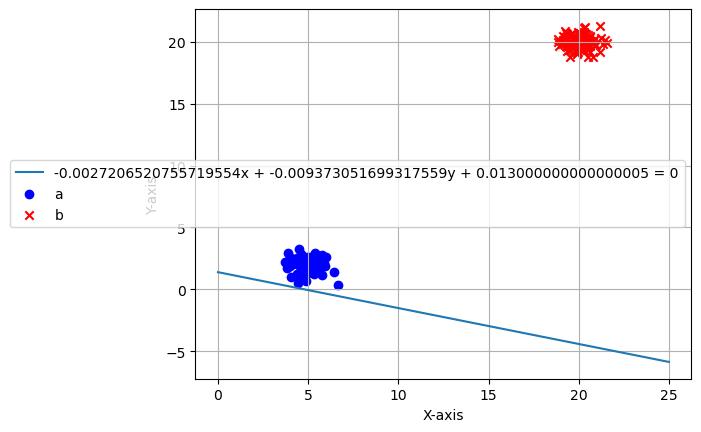

[ 0.013      -0.00272065 -0.00937305]


In [61]:
for i in range(0,1000):
    p.fit_one_epoch(X_train, y_train)

x = np.linspace(0, 25, 10)
a = p.W[1]
b = p.W[2]
c = p.W[0]
y = (-a / b) * x - (c / b) # ax + by + c = 0
plt.plot(x, y, label=f'{a}x + {b}y + {c} = 0')
plt.scatter(aX1, aX2, c='b', label='a', marker='o')
plt.scatter(bX1, bX2, c='r', label='b', marker='x')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

print(p.W)